In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
np.random.seed(42)

In [30]:
traditional_study_hours = np.random.normal(25, 5, 100)
accelerated_study_hours = np.random.normal(35, 8, 100) 
traditional_scores = np.random.normal(75, 12, 100)  
accelerated_scores = np.random.normal(82, 15, 100)
traditional_projects = np.random.poisson(8, 100)
accelerated_projects = np.random.poisson(12, 100)
accelerated_projects

array([16, 11, 10,  5, 18, 15, 14,  8,  6,  7, 10, 12, 10, 10, 20, 10,  7,
       12, 16, 11,  8,  8,  9,  8, 14, 12,  6,  9,  7, 12,  9, 11, 13, 11,
       12, 14, 12, 12, 13, 10, 14, 11,  9, 11, 15, 12, 13,  9, 14, 16, 10,
       11, 12, 11, 17, 11, 22, 14, 11, 13,  9, 11, 11, 14, 14,  9, 12, 15,
       12, 15, 15,  8, 13,  8, 13, 17, 13, 12,  9, 10,  9, 17,  8, 14, 15,
       14, 19, 10,  8,  9,  9, 15, 11,  9, 10, 17,  9,  5,  9, 11],
      dtype=int32)

In [32]:
data = pd.DataFrame({
    'Study_Hours_Per_Week': np.concatenate([traditional_study_hours, accelerated_study_hours]),
    'Performance_Score': np.concatenate([traditional_scores, accelerated_scores]),
    'Projects_Completed': np.concatenate([traditional_projects, accelerated_projects]),
    'Learning_Track': ['Traditional'] * 100 + ['Accelerated'] * 100
})

In [33]:
data.head()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
0,20.095413,79.553785,3,Traditional
1,18.360410,96.738058,2,Traditional
2,28.401327,74.008227,8,Traditional
3,30.789074,65.051797,9,Traditional
4,22.742952,59.803914,10,Traditional


In [ ]:
data.tail()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
195,31.403392,48.883736,17,Accelerated
196,43.140010,78.697081,9,Accelerated
197,56.305459,50.982179,5,Accelerated
198,32.635670,88.780500,9,Accelerated
199,36.218524,63.399096,11,Accelerated


In [40]:
data['Study_Hours_Per_Week'] = round(np.clip(data['Study_Hours_Per_Week'], 10, 60),1)  # 10-60 hours/week
data['Performance_Score'] = round(np.clip(data['Performance_Score'], 0, 100),1)  # 0-100 score
data['Projects_Completed'] = np.clip(data['Projects_Completed'], 1, 25)

In [41]:
data.head()

,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
0,20.1,79.6,3,Traditional
1,18.4,96.7,2,Traditional
2,28.4,74.0,8,Traditional
3,30.8,65.1,9,Traditional
4,22.7,59.8,10,Traditional


In [53]:

print(f"Total AI Engineering Students: {len(data)}")
print(f"Learning Tracks: {data['Learning_Track'].unique()}")
print("\nFirst 10 students in our dataset:")
print(data.head(10).round(1))


Total AI Engineering Students: 200
Learning Tracks: ['Traditional' 'Accelerated']

First 10 students in our dataset:
   Study_Hours_Per_Week  Performance_Score  Projects_Completed Learning_Track
0                  20.1               79.6                   3    Traditional
1                  18.4               96.7                   2    Traditional
2                  28.4               74.0                   8    Traditional
3                  30.8               65.1                   9    Traditional
4                  22.7               59.8                  10    Traditional
5                  22.8               74.3                   4    Traditional
6                  26.4               69.6                   6    Traditional
7                  21.5               99.1                   7    Traditional
8                  21.1               96.2                   7    Traditional
9                  29.4               62.6                   4    Traditional


In [58]:
data.groupby('Learning_Track')['Study_Hours_Per_Week'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,34.84,8.26,12.0,29.72,34.75,40.2,56.3
Traditional,100.0,25.16,4.79,14.5,21.42,25.80,28.6,36.5


In [59]:
data.groupby('Learning_Track')['Performance_Score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,81.72,13.91,46.0,73.65,84.05,92.93,100.0
Traditional,100.0,75.62,10.83,48.1,68.35,75.55,82.20,99.1


In [68]:
print("\n=== VISUAL REPRESENTATION ===")
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]
    print(f"\n{track} Learning Track (n={len(track_data)} students):")
    print("  Study Hours per Week:")
    print(f"    Mean: {track_data['Study_Hours_Per_Week'].mean():.1f} hours")
    print(f"    Median: {track_data['Study_Hours_Per_Week'].median():.1f} hours")
    print(f"    Standard Deviation: {track_data['Study_Hours_Per_Week'].std():.1f} hours")
    
    print("  Performance Scores:")
    print(f"    Mean: {track_data['Performance_Score'].mean():.1f}")
    print(f"    Median: {track_data['Performance_Score'].median():.1f}")
    print(f"    Standard Deviation: {track_data['Performance_Score'].std():.1f}")
    
    print("  Projects Completed:")
    print(f"    Mean: {track_data['Projects_Completed'].mean():.1f} projects")
    print(f"    Median: {track_data['Projects_Completed'].median():.1f} projects")
    print(f"    Range: {track_data['Projects_Completed'].min()} - {track_data['Projects_Completed'].max()} projects")


=== VISUAL REPRESENTATION ===

Traditional Learning Track (n=100 students):
  Study Hours per Week:
    Mean: 25.2 hours
    Median: 25.8 hours
    Standard Deviation: 4.8 hours
  Performance Scores:
    Mean: 75.6
    Median: 75.6
    Standard Deviation: 10.8
  Projects Completed:
    Mean: 7.7 projects
    Median: 8.0 projects
    Range: 2 - 14 projects

Accelerated Learning Track (n=100 students):
  Study Hours per Week:
    Mean: 34.8 hours
    Median: 34.8 hours
    Standard Deviation: 8.3 hours
  Performance Scores:
    Mean: 81.7
    Median: 84.0
    Standard Deviation: 13.9
  Projects Completed:
    Mean: 11.6 projects
    Median: 11.0 projects
    Range: 5 - 22 projects


In [63]:
ext_data = data[data["Learning_Track"] == "Accelerated"]
ext_data


,Study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
100,52.7,80.5,16,Accelerated
101,32.6,100.0,11,Accelerated
102,36.0,82.6,10,Accelerated
103,29.5,84.0,5,Accelerated
104,49.9,87.6,18,Accelerated
...,...,...,...,...
195,31.4,48.9,17,Accelerated
196,43.1,78.7,9,Accelerated
197,56.3,51.0,5,Accelerated
198,32.6,88.8,9,Accelerated


<Axes: ylabel='Count'>

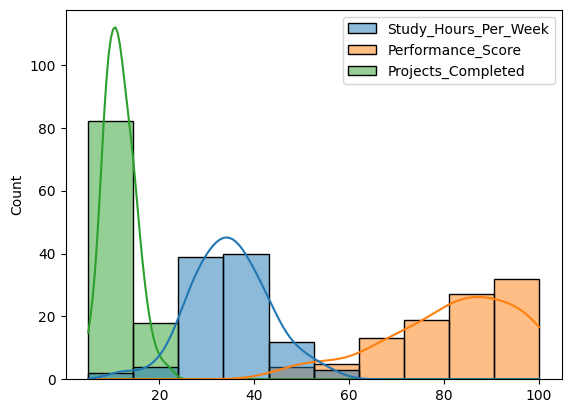

In [67]:
sns.histplot(ext_data, kde=True)

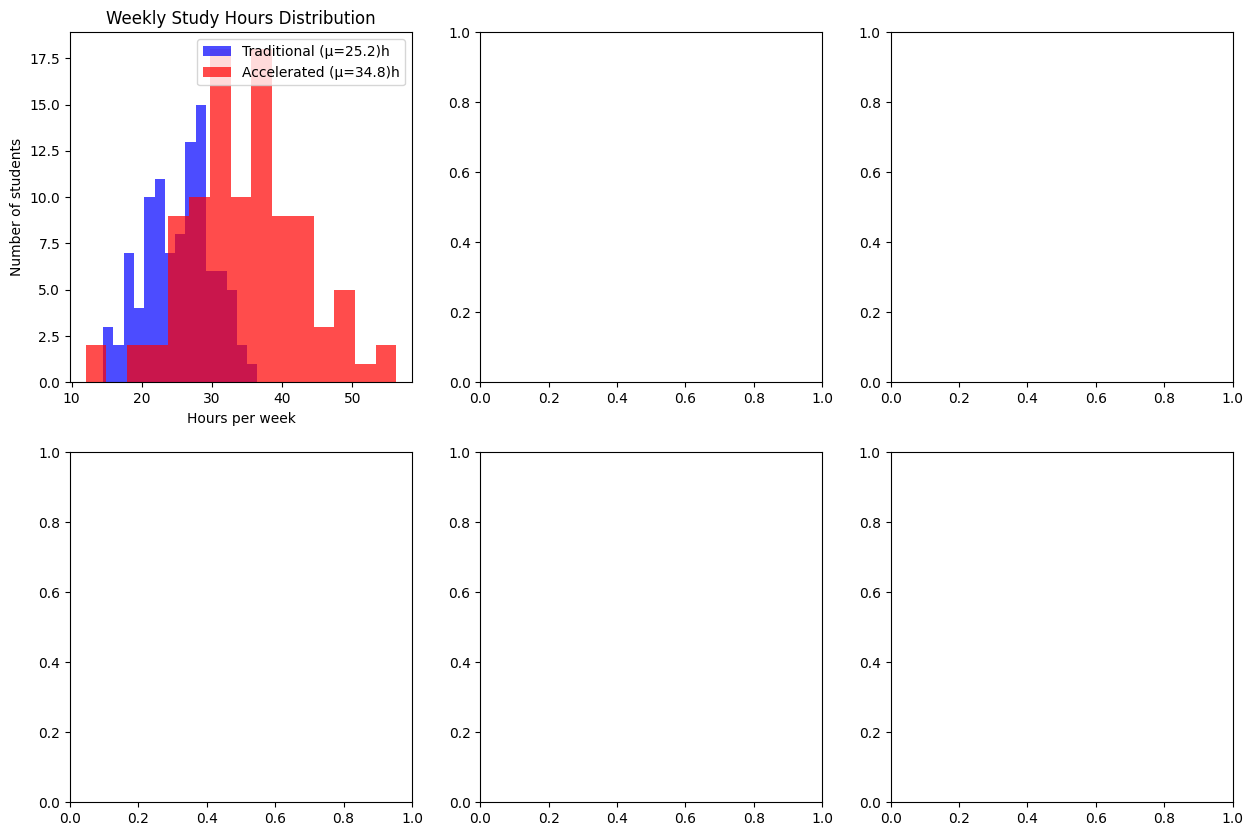

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))


for track in ['Traditional', 'Accelerated']:
    track_data = data[data["Learning_Track"]==track]["Study_Hours_Per_Week"]
    axes[0,0].hist(track_data, bins=15, alpha=0.7,
                   label=f"{track} (μ={track_data.mean():.1f})h",
                   color = "blue" if track == "Traditional" else "red")
axes[0,0].set_title("Weekly Study Hours Distribution")
axes[0,0].set_xlabel("Hours per week")
axes[0,0].set_ylabel("Number of students")
axes[0,0].legend()